In [1]:
# %pip install netgraph

Note: you may need to restart the kernel to use updated packages.


In [1]:
import networkx as nx #to create the diagram
from pandas import DataFrame #to read the excel sheet
import pandas as pd #to read the excel sheet
import matplotlib.pyplot as plt #plots the visuals
import matplotlib.patches as mpatches #allows custom legend
from netgraph import InteractiveGraph # pip install netgraph


#for getting the names from the excel sheet
filename = 'Sample1.xlsx'
xls = pd.read_excel(filename, sheet_name=None)
students = pd.read_excel(filename, sheet_name="names")
response_types = pd.read_excel(filename, sheet_name="response_types")
df = pd.read_excel(filename, sheet_name="discussion_data")

df = df.merge(response_types, how="left", on="response_type")
students


,name
0,Julie
1,Matt
2,Jose
3,Rachel
4,Xavier
5,Janet
6,Bryan
7,Fred


In [2]:
# first create the Graph -- this is the collection of all of the nodes and edges
G = nx.MultiDiGraph()
# add a node for each student
G.add_nodes_from(students["name"])


In [3]:
# make edges from the speaker/responder lists
edges = list(zip(df["speaker"], df["responder"]))

G.add_edges_from(edges)

first_speaker = edges[0][0]
last_responder = edges[-1][1]
def speaker_color(n):
    if n == first_speaker:
        return "green"
    if n == last_responder:
        return "red"
    return "darkslategray"

students["color"] = students["name"].apply(speaker_color)

node_color_map = {}
# # a lambda function has one statement and returns that result
def get_color(row):
    node_color_map[row["name"]] = row.color

students.apply(get_color, axis=1)
node_color_map


{'Julie': 'green',
 'Matt': 'darkslategray',
 'Jose': 'darkslategray',
 'Rachel': 'darkslategray',
 'Xavier': 'darkslategray',
 'Janet': 'darkslategray',
 'Bryan': 'red',
 'Fred': 'darkslategray'}

1 Talking Point
2 Quote
3 Connection
4 Discussion Question


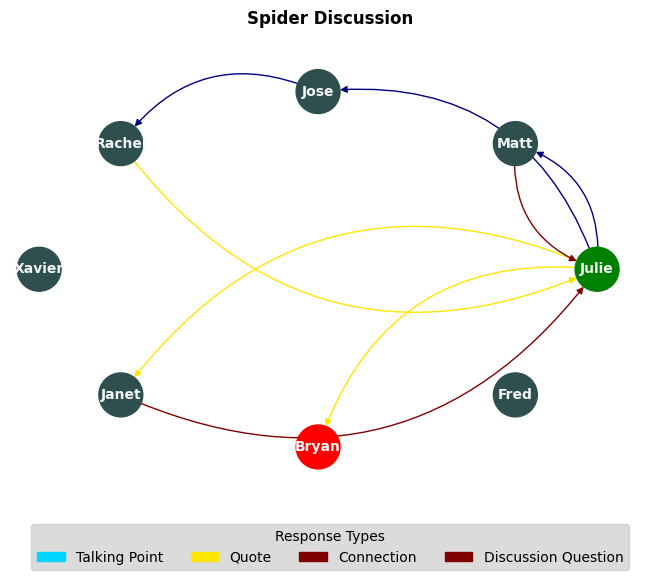

In [5]:
node_colors = [node_color_map[n] for n in students["name"]]
cmap = plt.cm.get_cmap('jet', len(response_types))
nx.draw_circular(G,
        node_color=node_colors,
        with_labels=True,
        node_size=1000,
        font_weight='bold',
        font_size=10,
        connectionstyle='arc3, rad = 0.4',
        font_color="whitesmoke",
        edge_color=df["response_type"],
        edge_cmap=cmap)

#adds the title for the visualization
#pulls the discussion name and concatenates it with the string 'Discussion Visualization'
plt.title("Spider Discussion", fontweight="bold")

# sets background color of the legend/other plt items
plt.rcdefaults()
plt.rcParams.update({'axes.facecolor':'lightgray'})

# creates the legend for the visualization
handles = []
response_types = response_types.sort_values(by="response_type")

def make_legend(row):
    print(row.response_type, row.response_name)
    handles.append(mpatches.Patch(color=cmap(row.response_type), label=row.response_name))

response_types.apply(make_legend, axis=1)
    
plt.legend(title='Response Types', bbox_to_anchor=(.5, -0.01), 
           loc='upper center', 
           ncol=len(handles), handles=handles)
plt.show()